In [9]:
import pandas as pd
import pylab as plt
import numpy as np
from datetime import datetime
import calendar

In [2]:
# read in data
datafile = 'C:/Users/rache/Documents/Capstone/Data/Historic Data 2006_2018.csv'
df = pd.read_csv(datafile)

df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,169180023,09/09/2017,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,959975,171772,40.638126,-74.087467
1,169180027,09/09/2017,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242
2,169180025,09/09/2017,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,999888,193014,40.696450,-73.943607
3,169180024,09/09/2017,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,997784,172132,40.639137,-73.951236
4,169180022,09/09/2017,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619


In [11]:
# make OCCUR_DATE a date
df["OCCUR_DATE"] = pd.to_datetime(df["OCCUR_DATE"])

# make year column
df['year'] = pd.DatetimeIndex(df['OCCUR_DATE']).year

# make month column
df['month'] = pd.DatetimeIndex(df['OCCUR_DATE']).month

# make day column
df['day'] = pd.DatetimeIndex(df['OCCUR_DATE']).day

# make day of the week
df['weekday'] = pd.DatetimeIndex(df['OCCUR_DATE']).weekday # 0 = Monday

df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,year,month,day,weekday
0,169180023,2017-09-09,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,...,M,BLACK,959975,171772,40.638126,-74.087467,2017,9,9,5
1,169180027,2017-09-09,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,...,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242,2017,9,9,5
2,169180025,2017-09-09,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,M,BLACK,999888,193014,40.696450,-73.943607,2017,9,9,5
3,169180024,2017-09-09,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,...,M,BLACK,997784,172132,40.639137,-73.951236,2017,9,9,5
4,169180022,2017-09-09,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619,2017,9,9,5


In [5]:
# add rows for dates where no shootings occured
df.set_index(df['OCCUR_DATE'], inplace = True)
df_all_dates = df.resample('D').sum().fillna(0)
    # making rows filled with zeroes might help me later...
    
df_all_dates.head(30)

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,Latitude,Longitude,year,month,day
OCCUR_DATE,,,,,,,,,
2006-01-01,209389241,598,0.0,4.0,326.056744,-591.367766,16048,8,8
2006-01-02,39813016,350,2.0,1.0,162.643273,-295.930820,8024,4,8
2006-01-03,39898403,361,0.0,1.0,162.809664,-295.513404,8024,4,12
2006-01-04,40154510,340,2.0,0.0,163.025611,-295.508891,8024,4,16
2006-01-05,40154530,257,0.0,0.0,163.051524,-295.632245,8024,4,20
2006-01-06,40154547,246,0.0,0.0,163.200747,-295.560325,8024,4,24
2006-01-07,20077285,179,0.0,1.0,81.388316,-147.768550,4012,2,14
2006-01-08,40154570,351,0.0,1.0,162.534809,-295.692038,8024,4,32
2006-01-09,90940403,500,2.0,5.0,366.843767,-665.388681,18054,9,81


In [6]:
# get season from date

# first build a function
def get_season(month,day):
    if month in [1, 2, 3]:
        season = 'Winter'
    elif month in [4, 5, 6]:
        season = 'Spring'
    elif month in [7, 8, 9]:
        season = 'Summer'
    else:
        season = 'Fall'

    if month == 3 & day > 19:
        season = 'Spring'
    elif month == 6 & day > 20:
        season = 'Summer'
    elif month == 9 & day > 21:
        season = 'Fall'
    elif month == 12 & day > 20:
        season = 'Winter'
    return season

# then run a for loop to make the list of seasons
s_list = []
for row in df.iterrows():
    m = row[1]['month']
    d = row[1]['day']
    s_list.append( get_season(m,d) )

# make list a column
df['season'] = s_list

In [7]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,year,month,day,season
OCCUR_DATE,,,,,,,,,,,,,,,,,,,,,
2017-09-09,169180023,2017-09-09,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,...,M,BLACK,959975,171772,40.638126,-74.087467,2017,9,9,Summer
2017-09-09,169180027,2017-09-09,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,...,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242,2017,9,9,Summer
2017-09-09,169180025,2017-09-09,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,M,BLACK,999888,193014,40.696450,-73.943607,2017,9,9,Summer
2017-09-09,169180024,2017-09-09,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,...,M,BLACK,997784,172132,40.639137,-73.951236,2017,9,9,Summer
2017-09-09,169180022,2017-09-09,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,...,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619,2017,9,9,Summer


([<matplotlib.axis.XTick at 0x1f1cf340198>,
 <a list of 4 Text xticklabel objects>)

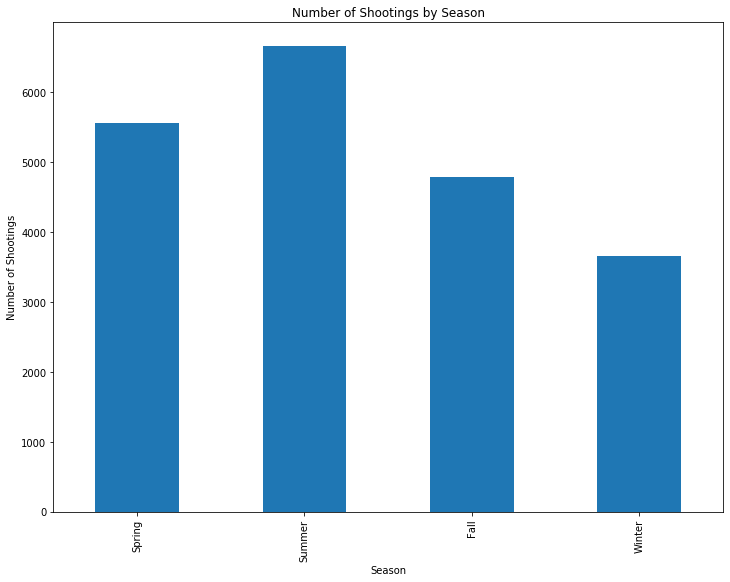

In [23]:

grouped = df.groupby(['season']).size().reset_index()

seasons = ['Spring', 'Summer', 'Fall', 'Winter']
mapping = {season: i for i, season in enumerate(seasons)}
key = grouped['season'].map(mapping)    
grouped = grouped.iloc[key.argsort()]

# Draw the bar chart
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
grouped.plot(kind='bar', legend = None)
plt.xlabel('Season')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings by Season')
ticks = ('Spring', 'Summer', 'Fall', 'Winter')
y_pos = np.arange(4)
plt.xticks(y_pos, ticks)

Text(0.5, 1.0, 'Number of Shootings by Month 2006-2018')

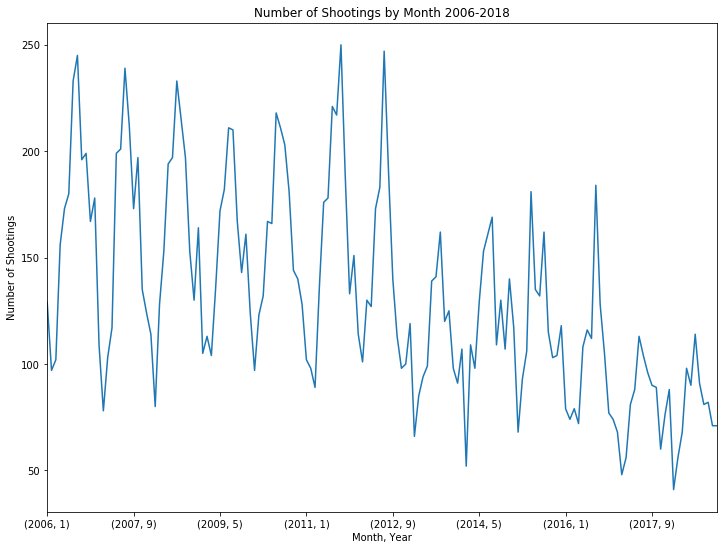

In [22]:
grouped = df.groupby(['year', 'month']).size()

# Draw the bar chart
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
grouped.plot(kind='line', legend = None)
plt.xlabel('Month, Year')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings by Month 2006-2018')

#grouped

[6.0, 4.0]